---

#### 데이터셋 개요
- 표본 수 : 8124개
- 특성 수 : 22개의 특성 + 1개의 타겟
- 각 특성 : 버섯의 형태적 특징을 설명(모양, 냄새, 색, 등등)
- 타겟 : 해당 버섯이 독이 있는지(poisonous) 또는 먹을 수 있는지(edible)

#### 타겟 변수 (정답, 예측하고자 하는 것)
- 버섯이 e인지 혹은 p인지 나타냄


#### 문제 정의
- 목표 : 버섯의 특성 22개를 보고 버섯이 먹을 수 있는지, 독이 있는지 예측하는 이진 분류 문제

#### 지도학습 모델의 역할
- 데이터를 학습하여, 새로운 버섯 샘플이 들어왔을 때 독이 있는지 없는지를 판단

---

In [ ]:
!pip install scikit-learn
!pip install seaborn

---

## A. 분류 데이터셋 선택

1번 데이터셋 활용

---

In [1]:
import pandas as pd

# 저장된 데이터셋을 불러오기
file_path = './Mushroom data.csv'

df = pd.read_csv(file_path)
print("로드 성공")
print(df.head())

로드 성공
  Mushroom_quality cap_shape cap_surface cap_color bruises odor  \
0                p         x           s         n       t    p   
1                e         x           s         y       t    a   
2                e         b           s         w       t    l   
3                p         x           y         w       t    p   
4                e         x           s         g       f    n   

  gill_attachment gill_spacing gill_size gill_color  ...  \
0               f            c         n          k  ...   
1               f            c         b          k  ...   
2               f            c         b          n  ...   
3               f            c         n          n  ...   
4               f            w         b          k  ...   

  stalk_surface_below_ring stalk_color_above_ring stalk_color_below_ring  \
0                        s                      w                      w   
1                        s                      w                      w   
2 

---
## B. 데이터 전처리
---

---

### 결측치 처리

---

##### 데이터 결측치를 확인하는 이유는 데이터셋 내에서 값이 존재하지 않는 부분을 확인해 모델 학습 오류 방지, 모델 성능 저하 방지, 데이터 분석의 왜곡 방지, 정보 손실 최소화하기 위함이다.

In [2]:
# 데이터 전처리를 위해 먼저 데이터에 결측치를 확인.
print("전체 데이터셋의 길이:")
print(len(df))

print("\n결측치 확인:")
print(df.isnull().sum())

전체 데이터셋의 길이:
8124

결측치 확인:
Mushroom_quality            0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalkshape                  0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64


---

#### 확인 결과 비어있는 데이터는 없지만 데이터가 '?'로 존재하거나 모두 같은 값을 갖는 데이터가 존재하는지 추가로 확인 진행

---

In [3]:
# 현재 veil_type 특징의 경우 모두 같은 값이기 때문에 삭제 진행
print("---------")
print((df == 'p').sum())


df = df.drop(['veil_type'], axis=1)

---------
Mushroom_quality            3916
cap_shape                      0
cap_surface                    0
cap_color                    144
bruises                        0
odor                         256
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                  1492
stalkshape                     0
stalk_root                     0
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring      1872
stalk_color_below_ring      1872
veil_type                   8124
veil_color                     0
ring_number                    0
ring_type                   3968
spore_print_color              0
population                     0
habitat                     1144
dtype: int64


In [4]:
# 현재 stalk_root의 경우 총 8124개의 데이터 중 2480개의 '?' 값을 지니고 있음.
print("---------")
print((df == '?').sum())

---------
Mushroom_quality               0
cap_shape                      0
cap_surface                    0
cap_color                      0
bruises                        0
odor                           0
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalkshape                     0
stalk_root                  2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_color                     0
ring_number                    0
ring_type                      0
spore_print_color              0
population                     0
habitat                        0
dtype: int64


---

결측치 처리 결과 : 
1. stalk_root 열의 값 중 '?'는 최빈값으로 대체
2. veil_type 열은 모두 같은 값을 갖기 때문에 해당 열을 삭제

---

In [5]:
# 해당 행을 모두 삭제하기에는 전체 데이터의 30%를 차지하기 때문에 stalk_root의 '?' 값을 최빈값으로 대체하고자 함.
# 최빈값 = 가장 자주 나오는 값으로 변경

# '?' → Na로 변환 후 최빈값으로 대체
df['stalk_root'].replace('?', pd.NA, inplace=True)
# df['stalk_root'].mode()[0] => 최빈값 중 첫 번째 값만 반환
df['stalk_root'].fillna(df['stalk_root'].mode()[0], inplace=True)


print((df == '?').sum())

Mushroom_quality            0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalkshape                  0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64


C:\Users\zoo\AppData\Local\Temp\ipykernel_23836\3072160915.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stalk_root'].replace('?', pd.NA, inplace=True)
C:\Users\zoo\AppData\Local\Temp\ipykernel_23836\3072160915.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

---

#### 먼저 입력 변수와 타겟 변수를 분리하고 인코딩/스케일링을 진행하는 이유 데이터 누수를 방지하기 위해서이다.

##### 만약 데이터를 나누기 전에 인코딩/스케일링을 하면, 훈련 데이터뿐만 아니라 테스트 데이터에 대한 정보도 인코더/스케일러가 알게 되기 때문에 마치 시험 전에 미리 시험지를 전달하는 것과 같은 상황이 되어버린다.

- OneHotEncoder가 전체 데이터로 학습하면, 테스트 데이터에만 있는 희귀 범주도 미리 알고 있게 됨.
- StandardScaler가 전체 평균/표준편차로 스케일링하면, 테스트 데이터의 통계도 반영된 것임.

---

In [6]:
# 데이터 누수를 방지하기 위해 인코딩/스케일링 전 데이터 분리 진행
# 입력 변수와 타겟 변수 분리
#X = df.drop(['Mushroom_quality', 'odor', 'gill_color', 'spore_print_color', 'bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'stalkshape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'population', 'habitat'], axis=1)
X = df.drop('Mushroom_quality', axis=1)
y = df['Mushroom_quality']

---

데이터셋 분류를 위해 train_test_split 기법을 활용하여 다음과 같이 분리 진행
- 학습용 75%
- 테스트용 25%
- 랜덤시드 : 42로 고정



---

In [7]:
from sklearn.model_selection import train_test_split

# 학습용과 테스트용 데이터 분할 (기본 75:25 비율, 랜덤시드 고정)
# stratify=y를 넣으면, 타겟 클래스의 비율이 train/test 양쪽에 동일하게 유지됨
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y  # stratify는 클래스 비율 유지
)

In [8]:
print("train_data set : ")
print("X_train: ", len(X_train))
print("y_train: ", len(y_train))

print("-----" * 15)

print("test_data set : ")
print("X_test: ", len(X_test))
print("y_test: ", len(y_test))

train_data set : 
X_train:  6093
y_train:  6093
---------------------------------------------------------------------------
test_data set : 
X_test:  2031
y_test:  2031


---

### 범주형 변수 인코딩

---




##### 범주형 변수 인코딩을 진행하는 이유는 범주형 변수가 유한하고 고정된 수의 카테고리 또는 그룹을 나타내는 변수이기 때문이다.(ex: 색상, 도시, 제품 유형 등) 
##### 따라서 범주형 데이터를 모델이 이해하고 처리할 수 있도록 수치 형태로 변환하는 과정이 필수적으로 진행되는데 이 과정이 바로 범주형 변수를 인코딩하는 과정이다.

#### 확인 결과 현 데이터셋의 경우 모두 범주형 변수로 구성되어 있기 때문에 OneHotEncoder를 활용해 인코딩을 진행하고자 함.

In [9]:
# 범주형 변수가 존재하는지 확인
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalkshape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']


In [10]:
from sklearn.preprocessing import OneHotEncoder

# oneHotEncoder 준비
ohe = OneHotEncoder(
    drop='first',            # 첫 번째 카테고리 더미 하나를 제거해서 다중공선성 완화
    handle_unknown='ignore', # 학습 때 없던 카테고리가 오면, 모두 0으로 처리
    sparse_output=False             # 결과를 NumPy 배열로 반환 (희소행렬이 필요하면 True)
)

In [11]:
from sklearn.compose import ColumnTransformer

# ColumnTransformer를 활용하여 인코딩 적용
encoder = ColumnTransformer(
    transformers=[
        ('onehot', ohe, categorical_cols)
    ],
    remainder='passthrough'  # 나머지 컬럼은 그대로 두기
)

아래와 같이 X_train, X_test로 나눠서 인코딩을 진행하는 이유
- 모델이 학습 데이터만 보고 규칙을 정하기 위함
- 똑같은 기준으로 테스트 데이터도 변환해야 훈련과 테스트가 같은 환경에서 비교가 가능하기 때문

In [12]:
# fit_transform을 fit, transform으로 나눠서 설명해보자 
# fit = 학습 데이터를 기준으로 인코딩할 규칙을 학습
# transform = 위에서 학습한 규칙을 X_train 데이터에 적용하여 실제로 변환
X_train_encoded = encoder.fit_transform(X_train)

# 이미 X_train에서 학습된 규칙을 토대로 transform을 통해 X_test에 적용하도록 함.
# 이때 X_test에 새로운 범주가 나타난다면 우리가 위해서 작성한 handle_unknown='ignore'로 인해 전부 0으로 처리됨.
X_test_encoded = encoder.transform(X_test)

In [13]:
import pandas as pd

# 인코딩 후 컬럼 이름 확인
encoded_cols = encoder.named_transformers_['onehot'].get_feature_names_out(categorical_cols)

# 넘파이 배열을 DataFrame으로 보기 쉽게
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols)
X_train_encoded_df.head()

,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,cap_color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# 인코딩 된 컬럼 이름과 갯수
print(encoded_cols)
print(len(encoded_cols))

['cap_shape_c' 'cap_shape_f' 'cap_shape_k' 'cap_shape_s' 'cap_shape_x'
 'cap_surface_g' 'cap_surface_s' 'cap_surface_y' 'cap_color_c'
 'cap_color_e' 'cap_color_g' 'cap_color_n' 'cap_color_p' 'cap_color_r'
 'cap_color_u' 'cap_color_w' 'cap_color_y' 'bruises_t' 'odor_c' 'odor_f'
 'odor_l' 'odor_m' 'odor_n' 'odor_p' 'odor_s' 'odor_y' 'gill_attachment_f'
 'gill_spacing_w' 'gill_size_n' 'gill_color_e' 'gill_color_g'
 'gill_color_h' 'gill_color_k' 'gill_color_n' 'gill_color_o'
 'gill_color_p' 'gill_color_r' 'gill_color_u' 'gill_color_w'
 'gill_color_y' 'stalkshape_t' 'stalk_root_c' 'stalk_root_e'
 'stalk_root_r' 'stalk_surface_above_ring_k' 'stalk_surface_above_ring_s'
 'stalk_surface_above_ring_y' 'stalk_surface_below_ring_k'
 'stalk_surface_below_ring_s' 'stalk_surface_below_ring_y'
 'stalk_color_above_ring_c' 'stalk_color_above_ring_e'
 'stalk_color_above_ring_g' 'stalk_color_above_ring_n'
 'stalk_color_above_ring_o' 'stalk_color_above_ring_p'
 'stalk_color_above_ring_w' 'stalk_color_abov

In [15]:
# X_test 인코딩 결과도 DataFrame으로 보기 좋게 변환
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols)
X_test_encoded_df.head()

,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,cap_color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

### 스케일링(StandardScaler) 과정 필요 여부 확인

---

In [16]:
from sklearn.preprocessing import StandardScaler
numerical_cols = X_train_encoded_df.select_dtypes(exclude='object').columns.tolist()
print(numerical_cols)

['cap_shape_c', 'cap_shape_f', 'cap_shape_k', 'cap_shape_s', 'cap_shape_x', 'cap_surface_g', 'cap_surface_s', 'cap_surface_y', 'cap_color_c', 'cap_color_e', 'cap_color_g', 'cap_color_n', 'cap_color_p', 'cap_color_r', 'cap_color_u', 'cap_color_w', 'cap_color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill_attachment_f', 'gill_spacing_w', 'gill_size_n', 'gill_color_e', 'gill_color_g', 'gill_color_h', 'gill_color_k', 'gill_color_n', 'gill_color_o', 'gill_color_p', 'gill_color_r', 'gill_color_u', 'gill_color_w', 'gill_color_y', 'stalkshape_t', 'stalk_root_c', 'stalk_root_e', 'stalk_root_r', 'stalk_surface_above_ring_k', 'stalk_surface_above_ring_s', 'stalk_surface_above_ring_y', 'stalk_surface_below_ring_k', 'stalk_surface_below_ring_s', 'stalk_surface_below_ring_y', 'stalk_color_above_ring_c', 'stalk_color_above_ring_e', 'stalk_color_above_ring_g', 'stalk_color_above_ring_n', 'stalk_color_above_ring_o', 'stalk_color_above_ring_p', 'st

- 이전에 모든 데이터가 이미 범주형 데이터였고 수치형 데이터는 존재하지 않았음.
- 현재는 OneHotEncoder를 활용해 범주형 데이터를 0/1로 만든 상태임
- 스케일링의 경우 변수의 범위 차이 때문에 필요한 전처리인데 현 상황에서는 모든 데이터가 0 아니면 1이기 때문에 굳이 스케일링 과정이 필요하지 않음.

## 결론 : 스케일링 진행 X

---

EDA 시각화 진행

---

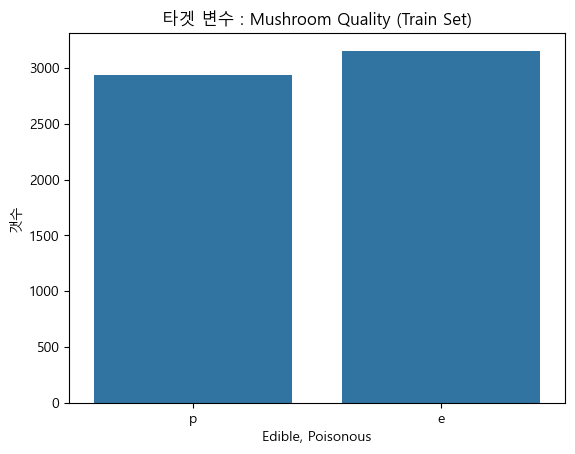

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 한글 폰트 설정 (예: Malgun Gothic)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False  # 음수 기호 표시 문제 해결

# 타겟 변수 비율 확인
# 클래스 비율 확인
sns.countplot(x=y_train)
plt.title("타겟 변수 : Mushroom Quality (Train Set)")
plt.xlabel("Edible, Poisonous")
plt.ylabel("갯수")
plt.show()

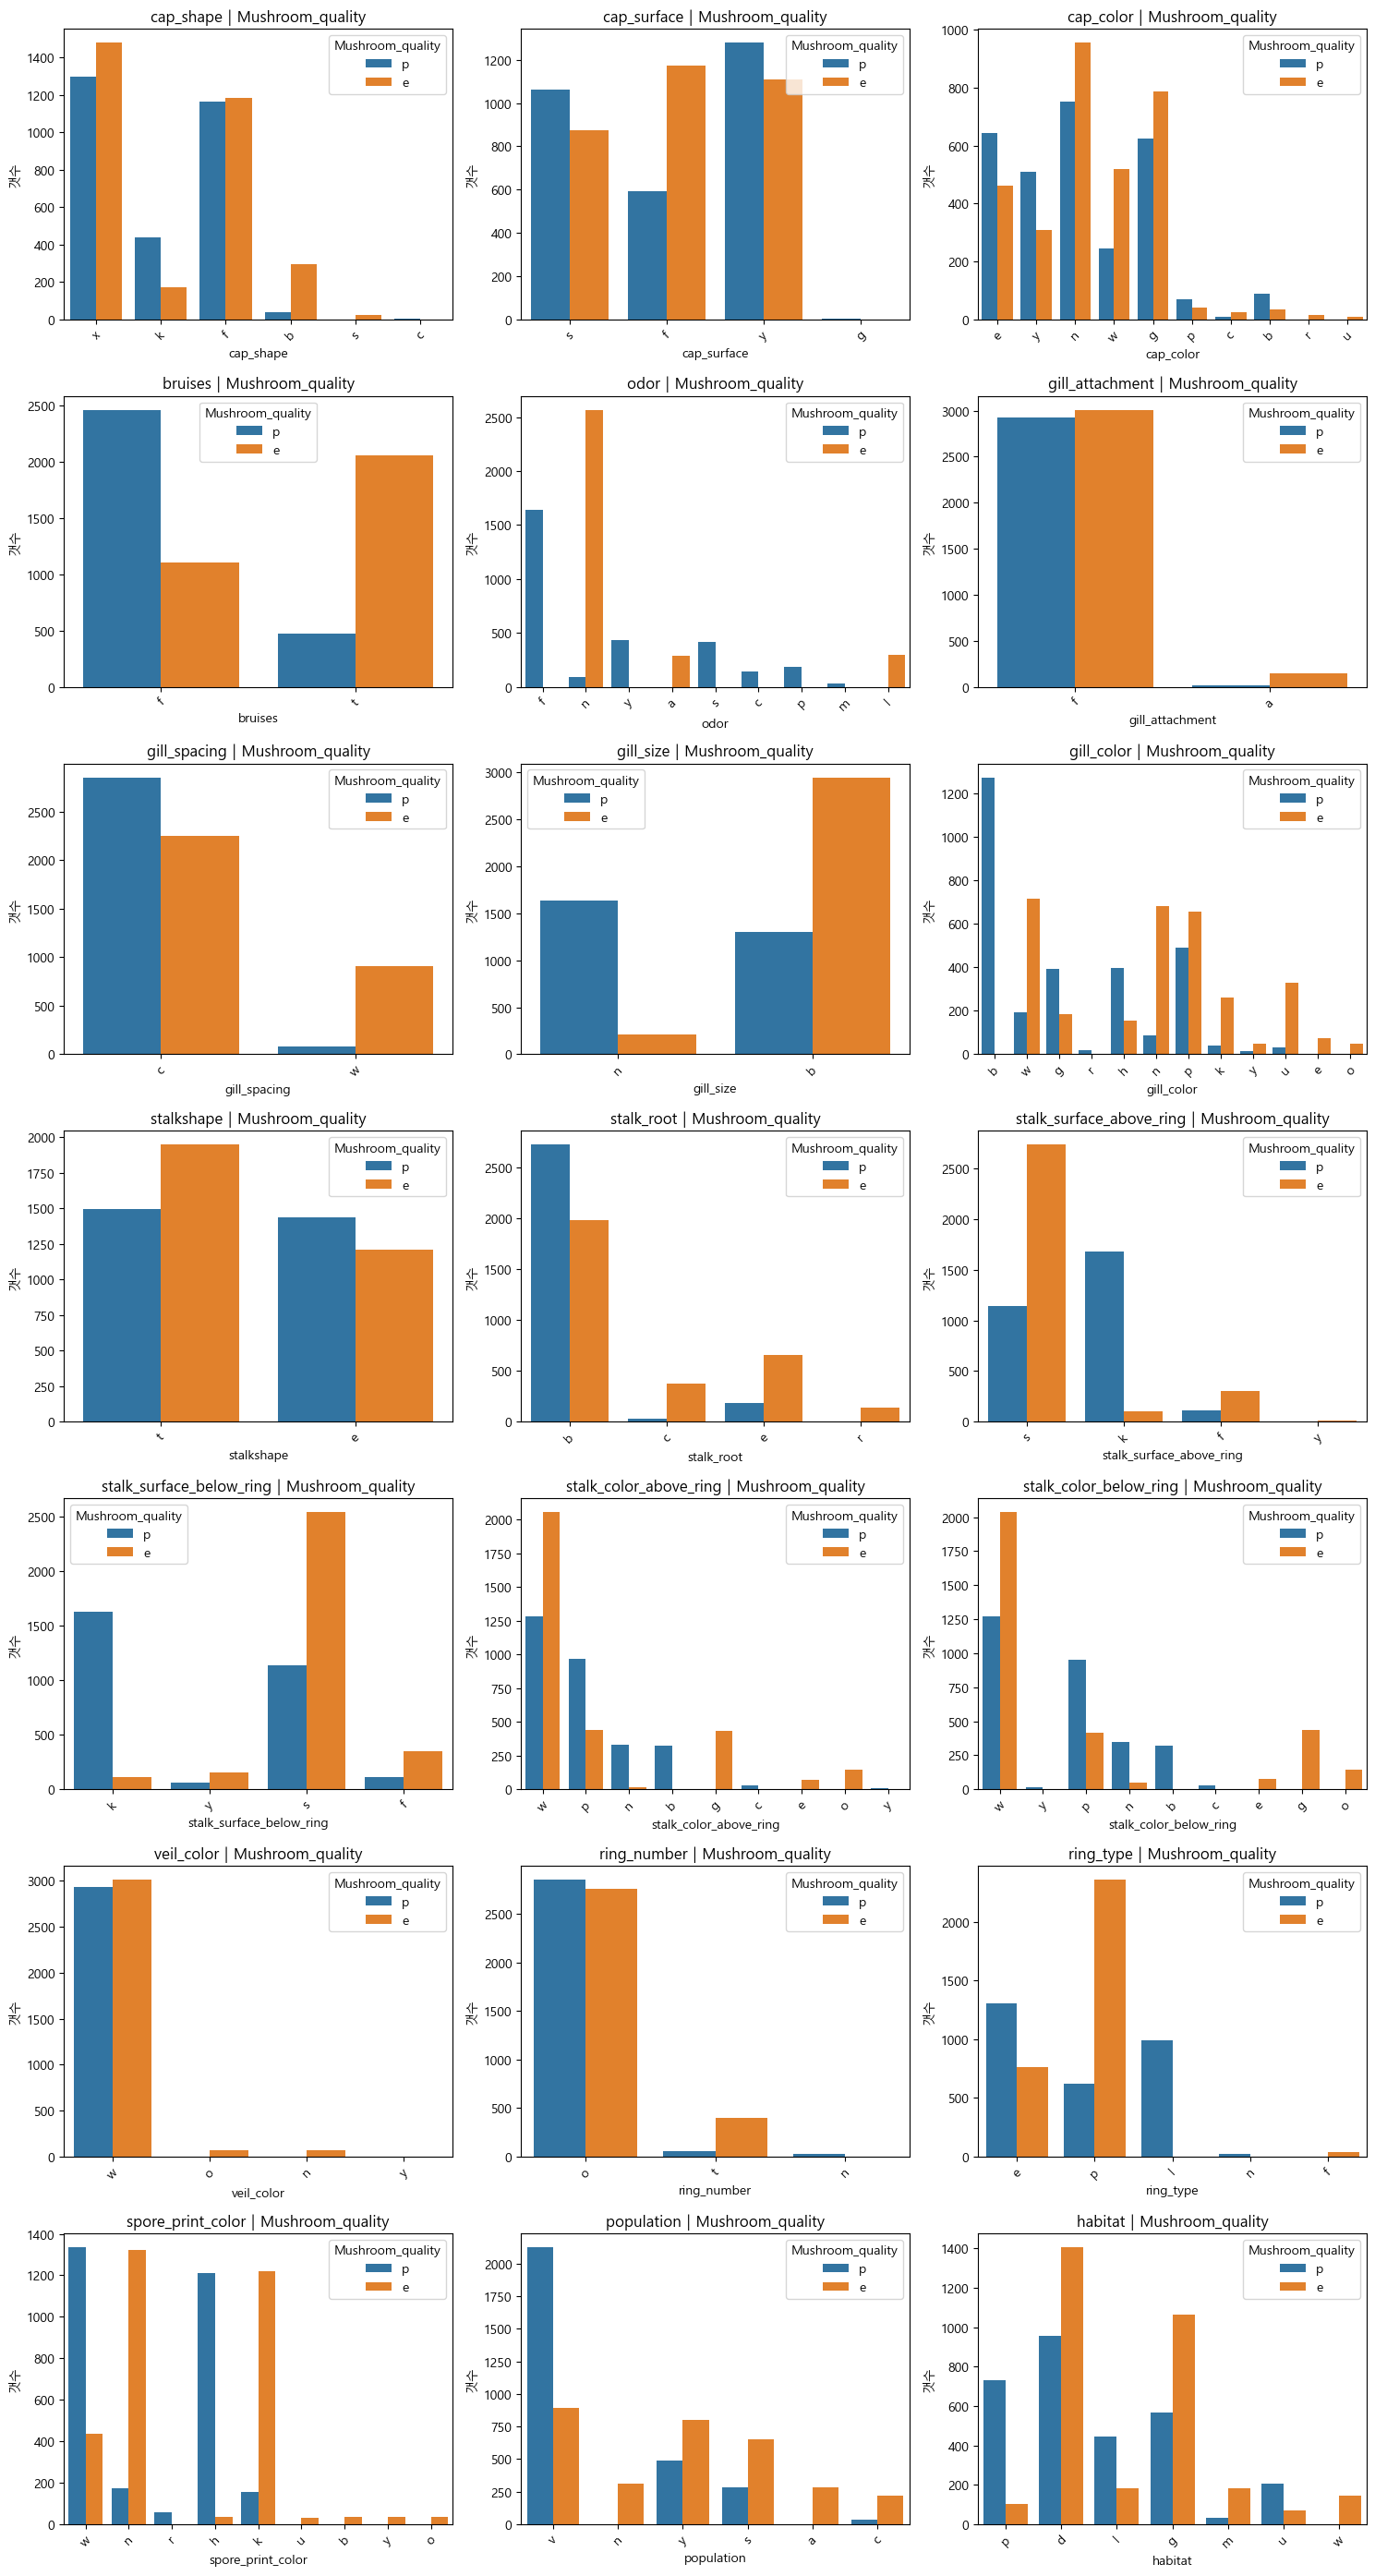

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# veil_type을 제외한 21개의 특성과 타겟 데이터와의 관계를 표시.

# 사용할 원본 데이터셋 (인코딩 전, 훈련 데이터 기준)
train_df = pd.concat([X_train, y_train], axis=1)

# 범주형 피처 리스트
cat_cols = X_train.columns

# 서브플롯 생성
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(data=train_df, x=col, hue='Mushroom_quality')
    plt.title(f'{col} | Mushroom_quality')
    plt.xlabel(col)
    plt.ylabel("갯수")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


---

## C. 분류 모델 구현, D 성능 평가

선택 모델
- RandomForestClassifier : 과적합에 강하고, 인코딩된 데이터에 적합함
- DecisionTreeClassifier : 인코딩 데이터에 적합하고 빠르며 해석이 가능함

---

1. RandomForestClassifier 결과
Accuracy: 1.0
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

--------------------------------------------------

Confusion Matrix:
 [[1052    0]
 [   0  979]]
--------------------------------------------------
ROC AUC Score: 1.0
--------------------------------------------------


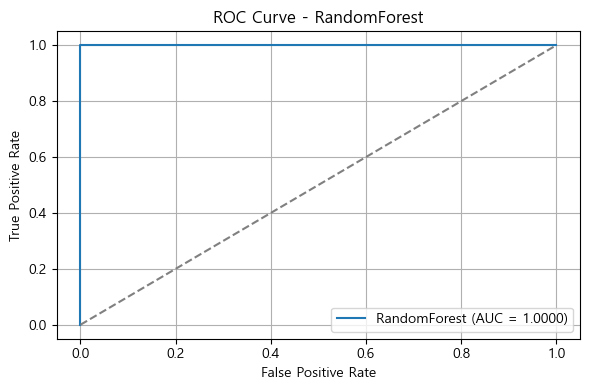

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt


# 타겟 레이블 숫자 변환 => ROC Curve 그래프를 표현하기 위해서 활용
le = LabelEncoder()
y_train_num = le.fit_transform(y_train)
y_test_num = le.transform(y_test)

# 모델 생성
rf_clf = RandomForestClassifier(random_state=42)

# 모델 학습
# .fit(X_train_encoded, y_train) => 인코딩된 훈련 데이터를 사용해 모델 학습 진행
rf_clf.fit(X_train_encoded, y_train)

# 예측
# .predict(X_test_encoded) => 학습된 모델로 테스트 데이터를 예측해.
y_pred_rf = rf_clf.predict(X_test_encoded)

# 평가
print("1. RandomForestClassifier 결과")
# 정확도, 정밀도, 재현율, f1-score 확인인
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("-----" * 10)

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("-----" * 10)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("-----" * 10)

# ROC Curve & AUC
y_proba_rf = rf_clf.predict_proba(X_test_encoded)[:, 1]  # 양성 클래스 확률
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_num, y_proba_rf)
auc_rf = roc_auc_score(y_test_num, y_proba_rf)
print("ROC AUC Score:", auc_rf)
print("-----" * 10)

# 시각화
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2. DecisionTreeClassifier 결과
Accuracy: 1.0
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

--------------------------------------------------

Confusion Matrix:
 [[1052    0]
 [   0  979]]
--------------------------------------------------
ROC AUC Score: 1.0
--------------------------------------------------


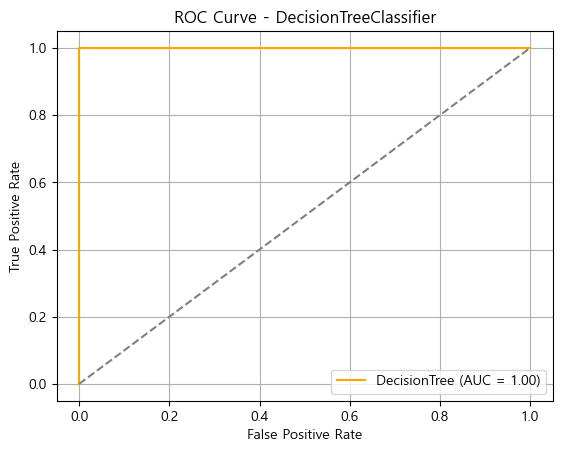

In [20]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
dt_clf = DecisionTreeClassifier(random_state=42)

# 모델 학습
dt_clf.fit(X_train_encoded, y_train)

# 예측
y_pred_dt = dt_clf.predict(X_test_encoded)

# 평가
print("2. DecisionTreeClassifier 결과")
# 정확도, 정밀도, 재현율, f1-score 확인인
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("-----" * 10)

print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("-----" * 10)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("-----" * 10)

# ROC Curve & AUC
y_proba_dt = dt_clf.predict_proba(X_test_encoded)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_num, y_proba_dt)
auc_dt = roc_auc_score(y_test_num, y_proba_dt)
print("ROC AUC Score:", auc_dt)
print("-----" * 10)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'DecisionTree (AUC = {auc_dt:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DecisionTreeClassifier')
plt.legend()
plt.grid(True)
plt.show()


<span style="color:orange">

---

1. 현재 모델 학습 및 평가 결과 위와 같이 21개의 컬럼을 활용한 경우 1의 정확도 나오는 것을 확인함. 이유를 찾아보니 현재 데이터셋의 완성도가 높아 모든 컬럼을 활용하게 되는 경우 1의 정확도가 나오는 것을 확인함.

2. 따라서 추가적인 진행을 위해 아래의 코드에 대해서는 대부분이 동일하지만 모든 컬럼을 활용하는 것이 아닌 이 중에서 작은 영향을 미치는 컬럼을 찾아 해당 컬럼들과 파라미터 튜닝을 진행해 보고자 함.

3. 하나씩 대입하여 확인한 결과 가장 큰 영향을 주는 컬럼은 'odor'로 해당 컬럼 하나만으로도 정확도가 0.987이 나오는 것을 알 수 있음. 

4. 따라서 현재 'cap_shape', 'cap_surface', 'cap_color' 컬럼(버섯의 갓 모양, 표면, 색)을 활용하여 남은 과정을 진행해 보고자 함.

---

</span>

<span style="color:yellowgreen">

---

### 위 코드와 동일한 조건에 'cap_shape', 'cap_surface', 'cap_color' 컬럼만을 활용하고 하이퍼파라미터 튜닝을 진행해 정확률 향상을 목표하고자 함

---

</span>

In [21]:
# 데이터 누수를 방지하기 위해 인코딩/스케일링 전 데이터 분리 진행
# 입력 변수와 타겟 변수 분리
X2 = df.drop(['Mushroom_quality', 'odor', 'gill_color', 'spore_print_color', 'bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'stalkshape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'population', 'habitat'], axis=1)
y2 = df['Mushroom_quality']

from sklearn.model_selection import train_test_split

# 학습용과 테스트용 데이터 분할 (기본 75:25 비율, 랜덤시드 고정)
# stratify=y를 넣으면, 타겟 클래스의 비율이 train/test 양쪽에 동일하게 유지됨
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.25, random_state=42, stratify=y2  # stratify는 클래스 비율 유지
)

# 범주형 변수가 존재하는지 확인
categorical_cols2 = X_train2.select_dtypes(include='object').columns.tolist()

print("-----" * 10)
print("사용하는 컬럼 리스트 : ", categorical_cols2)
print("-----" * 10)

from sklearn.preprocessing import OneHotEncoder

# oneHotEncoder 준비비
ohe = OneHotEncoder(
    drop='first',            # 첫 번째 카테고리 더미 하나를 제거해서 다중공선성 완화
    handle_unknown='ignore', # 학습 때 없던 카테고리가 오면, 모두 0으로 처리
    sparse_output=False             # 결과를 NumPy 배열로 반환 (희소행렬이 필요하면 True)
)

from sklearn.compose import ColumnTransformer

# ColumnTransformer를 활용하여 인코딩 적용
encoder = ColumnTransformer(
    transformers=[
        ('onehot', ohe, categorical_cols2)
    ],
    remainder='passthrough'  # 나머지 컬럼은 그대로 두기
)

# fit_transform을 fit, transform으로 나눠서 설명해보자 
# fit = 학습 데이터를 기준으로 인코딩할 규칙을 학습
# transform = 위에서 학습한 규칙을 X_train 데이터에 적용하여 실제로 변환
X_train_encoded2 = encoder.fit_transform(X_train2)

# 이미 X_train에서 학습된 규칙을 토대로 transform을 통해 X_test에 적용하도록 함.
# 이때 X_test에 새로운 범주가 나타난다면 우리가 위해서 작성한 handle_unknown='ignore'로 인해 전부 0으로 처리됨.
X_test_encoded2 = encoder.transform(X_test2)

--------------------------------------------------
사용하는 컬럼 리스트 :  ['cap_shape', 'cap_surface', 'cap_color']
--------------------------------------------------


--------------------------------------------------
1. RandomForestClassifier 결과
Accuracy: 0.7232890201871
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           e       0.73      0.74      0.73      1052
           p       0.72      0.71      0.71       979

    accuracy                           0.72      2031
   macro avg       0.72      0.72      0.72      2031
weighted avg       0.72      0.72      0.72      2031

--------------------------------------------------

Confusion Matrix:
 [[776 276]
 [286 693]]
--------------------------------------------------
ROC AUC Score: 0.8243469319589711
--------------------------------------------------


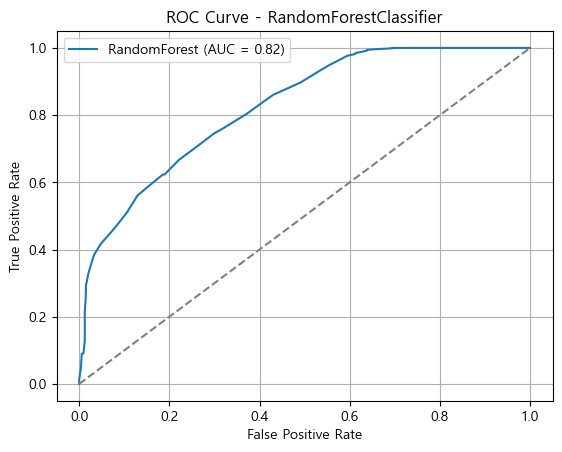

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 타겟 레이블을 숫자로 변환하여 ROC Curve 그래프 표시 진행행
le2 = LabelEncoder()
y_train_num2 = le2.fit_transform(y_train2)
y_test_num2 = le2.transform(y_test2)

# 모델 생성
rf_clf2 = RandomForestClassifier(random_state=42)

# 모델 학습
# .fit(X_train_encoded, y_train) => 인코딩된 훈련 데이터를 사용해 모델 학습 진행
rf_clf2.fit(X_train_encoded2, y_train2)

# 예측
# .predict(X_test_encoded) => 학습된 모델로 테스트 데이터를 예측해.
y_pred_rf2 = rf_clf2.predict(X_test_encoded2)

# 평가
print("-----" * 10)
print("1. RandomForestClassifier 결과")
# 정확도, 정밀도, 재현율, f1-score 확인인
print("Accuracy:", accuracy_score(y_test2, y_pred_rf2))
print("-----" * 10)

print("\nClassification Report:\n", classification_report(y_test2, y_pred_rf2))
print("-----" * 10)

print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_rf2))
print("-----" * 10)

# ROC Curve & AUC
y_proba_rf2 = rf_clf2.predict_proba(X_test_encoded2)[:, 1]  # 양성 클래스 확률
fpr_rf2, tpr_rf2, thresholds_r2 = roc_curve(y_test_num2, y_proba_rf2)
auc_rf2 = roc_auc_score(y_test_num2, y_proba_rf2)
print("ROC AUC Score:", auc_rf2)
print("-----" * 10)

plt.figure()
plt.plot(fpr_rf2, tpr_rf2, label=f'RandomForest (AUC = {auc_rf2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForestClassifier')
plt.legend()
plt.grid(True)
plt.show()

--------------------------------------------------
2. DecisionTreeClassifier 결과
Accuracy: 0.7267355982274741
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           e       0.72      0.78      0.75      1052
           p       0.74      0.67      0.70       979

    accuracy                           0.73      2031
   macro avg       0.73      0.72      0.72      2031
weighted avg       0.73      0.73      0.73      2031

--------------------------------------------------

Confusion Matrix:
 [[823 229]
 [326 653]]
--------------------------------------------------
ROC AUC Score: 0.823916796451722
--------------------------------------------------


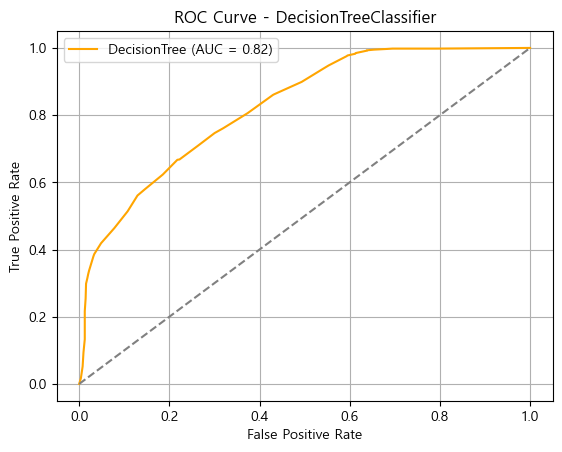

In [23]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
dt_clf2 = DecisionTreeClassifier(random_state=42)

# 모델 학습
dt_clf2.fit(X_train_encoded2, y_train2)

# 예측
y_pred_dt2 = dt_clf2.predict(X_test_encoded2)

# 평가
print("-----" * 10)
print("2. DecisionTreeClassifier 결과")
# 정확도, 정밀도, 재현율, f1-score 확인인
print("Accuracy:", accuracy_score(y_test2, y_pred_dt2))
print("-----" * 10)

print("\nClassification Report:\n", classification_report(y_test2, y_pred_dt2))
print("-----" * 10)

print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_dt2))
print("-----" * 10)

# ROC Curve & AUC
y_proba_dt2 = dt_clf2.predict_proba(X_test_encoded2)[:, 1]
fpr_dt2, tpr_dt2, thresholds_dt2 = roc_curve(y_test_num2, y_proba_dt2)
auc_dt2 = roc_auc_score(y_test_num2, y_proba_dt2)
print("ROC AUC Score:", auc_dt2)
print("-----" * 10)

plt.figure()
plt.plot(fpr_dt2, tpr_dt2, label=f'DecisionTree (AUC = {auc_dt2:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DecisionTreeClassifier')
plt.legend()
plt.grid(True)
plt.show()

---

## E. 하이퍼파라미터 튜닝 진행 (GridSearchCV)

---

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 튜닝 파라미터 후보
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV 객체 생성
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# 학습
rf_grid_search.fit(X_train_encoded2, y_train2)

# 최적 파라미터 출력
print("최적의 파라미터 :", rf_grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
최적의 파라미터 : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [25]:
from sklearn.tree import DecisionTreeClassifier

# 결정트리 튜닝 파라미터 후보
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV 객체 생성
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# 학습
dt_grid_search.fit(X_train_encoded2, y_train2)

# 최적 파라미터 출력
print("최적의 파라미터 :", dt_grid_search.best_params_)


Fitting 5 folds for each of 160 candidates, totalling 800 fits
최적의 파라미터 : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [26]:
# 최적 모델
best_rf_model = rf_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_

# 예측
y_pred_rf_best = best_rf_model.predict(X_test_encoded2)
y_pred_dt_best = best_dt_model.predict(X_test_encoded2)


# 평가
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("========== RandomForestClassifier (튜닝 후) 결과 ==========")
print(f"정확도 (Accuracy): {accuracy_score(y_test2, y_pred_rf_best):.4f}")
print(f"정밀도 (Precision): {precision_score(y_test2, y_pred_rf_best, pos_label='p'):.4f}")
print(f"재현율 (Recall): {recall_score(y_test2, y_pred_rf_best, pos_label='p'):.4f}")
print(f"F1 점수 (F1-score): {f1_score(y_test2, y_pred_rf_best, pos_label='p'):.4f}")
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test2, y_pred_rf_best))
print("\n분류 보고서 (Classification Report):\n", classification_report(y_test2, y_pred_rf_best))



print("\n========== DecisionTreeClassifier (튜닝 후) ==========")
print(f"정확도 (Accuracy): {accuracy_score(y_test2, y_pred_dt_best):.4f}")
print(f"정밀도 (Precision): {precision_score(y_test2, y_pred_dt_best, pos_label='p'):.4f}")
print(f"재현율 (Recall): {recall_score(y_test2, y_pred_dt_best, pos_label='p'):.4f}")
print(f"F1 점수 (F1-score): {f1_score(y_test2, y_pred_dt_best, pos_label='p'):.4f}")
print("\n혼동 행렬 (Confusion Matrix):\n", confusion_matrix(y_test2, y_pred_dt_best))
print("\n분류 보고서 (Classification Report):\n", classification_report(y_test2, y_pred_dt_best))


========== RandomForestClassifier (튜닝 후) 결과 ==========
정확도 (Accuracy): 0.7243
정밀도 (Precision): 0.7362
재현율 (Recall): 0.6670
F1 점수 (F1-score): 0.6999

혼동 행렬 (Confusion Matrix):
 [[818 234]
 [326 653]]

분류 보고서 (Classification Report):
               precision    recall  f1-score   support

           e       0.72      0.78      0.74      1052
           p       0.74      0.67      0.70       979

    accuracy                           0.72      2031
   macro avg       0.73      0.72      0.72      2031
weighted avg       0.73      0.72      0.72      2031


========== DecisionTreeClassifier (튜닝 후) ==========
정확도 (Accuracy): 0.7253
정밀도 (Precision): 0.7395
재현율 (Recall): 0.6639
F1 점수 (F1-score): 0.6997

혼동 행렬 (Confusion Matrix):
 [[823 229]
 [329 650]]

분류 보고서 (Classification Report):
               precision    recall  f1-score   support

           e       0.71      0.78      0.75      1052
           p       0.74      0.66      0.70       979

    accuracy                           0.73  

---

## 파라미터 튜닝 결과 

### RandomForestClassifier 모델의 경우 튜닝 전보다 재현율, F1 점수, 정확도 모두 상승한 것을 확인할 수 있었다.
- 튜닝 전 정확도 : 0.7232
- 튜닝 후 정확도 : 0.7243

---

### 반면에 DecisionTreeClassifier 모델의 경우 튜닝 전보다 정확도가 떨어진 것을 확인할 수 있었다.
- 튜닝 전 정확도 : 0.7267
- 튜닝 후 정확도 : 0.7253

---